**PROJECT DESCRIPTION**

Data-driven Customer Profile and Business Analytics

Using the card transaction information of customers:
1. identify groups of customers
2. manage within-group analysis to identify the profile of each group
3. draw business insights

Method: Semi-Structured Machine Learning

Unsupervised learning 


*   Customer groups
*   List item



Supervised learning


*   Confirmation of customer groups (validation of Unsupervised machine learning)
*   List item






**DATA DESCRIPTION**



customer_id : id of the credit card holder

balance_account : balance amount left in the account to make purchases at the end of the 6-month period

purchases_amount : amount of purchases made from account

paid_advance : number of transactions made with “Cash in Advance” method

full_purchases : maximum purchase amount done in full payment

balance_frequency_update : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)

installments : amount of purchases done in installments

purchases_frequency : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)

full_purchases_frequency : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)

purchases_installments_frequency : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)

cash_advance_frequency : how frequently the cash in advance being paid

nr_cash_advances : cash in advance given by the user

nr_purchases : number of purchase transactions made

credit_limit : limit of credit card for user

fixed_rate_period : duration of fixed interest rate of credit card service for user (in months)

payments : amount of payment done by user

min_payments : minimum amount of payments made by user

full_payment_prc : percent of full payment paid by user



In [ ]:
# !curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
# !curl https://raw.githubusercontent.com/EpistasisLab/tpot/master/requirements.txt | xargs -n 1 -L 1 pip install
# !pip install auto-sklearn
!pip install --pre pycaret
# !pip install yellowbrick
# !pip install tpot
# !pip install flaml
# !pip install interpret
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.1/480.1 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LOAD FUNCTIONS
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
# ----------------------------------VISUALIZATION---------------------------
from sklearn.manifold import TSNE  
from plotly import graph_objs as go

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import plotly.express as px
# ----------------------------------MachineLearning---------------------------
# Libraries:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from umap import UMAP
from pycaret.classification import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

ModuleNotFoundError: ignored

In [ ]:
# LOAD DATA
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/ML_group challenge/card_transactions (1).csv')

df.drop_duplicates().head(10)

Mounted at /content/drive


,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000
5,3Zx75mmL4wXFf36M,9266.080540,100.00,4383.296268,0.00,1.000000,100.0,0.333333,0.000000,0.250000,0.166667,3,4,17500.0,12,2444.123547,2603.406476,0.000000
6,VIncqsQDzbMSsvL9,97.389327,60.00,0.000000,60.00,1.000000,0.0,0.083333,0.083333,0.000000,0.000000,0,1,12500.0,12,453.421982,204.880010,0.000000
7,fDoLh1FTtFMuu3xs,4788.283283,0.00,437.808586,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.166667,2,0,5000.0,12,823.840717,1934.821741,0.000000
8,OpclyuJ9WGTLImw1,319.037744,1262.28,0.000000,1262.28,0.818182,0.0,0.250000,0.250000,0.000000,0.000000,0,6,10500.0,12,1350.541585,218.810614,0.125000
9,k2GbzBNCo0TQmwaw,1641.251218,0.00,2990.165538,0.00,0.727273,0.0,0.000000,0.000000,0.000000,0.166667,4,0,3000.0,12,4399.723425,500.276155,0.142857


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       8500 non-null   object 
 1   balance_account                   8500 non-null   float64
 2   purchases_amount                  8500 non-null   float64
 3   paid_advance                      8500 non-null   float64
 4   full_purchases                    8500 non-null   float64
 5   balance_frequency_update          8500 non-null   float64
 6   installments                      8500 non-null   float64
 7   purchases_frequency               8500 non-null   float64
 8   full_purchases_frequency          8500 non-null   float64
 9   purchases_installments_frequency  8500 non-null   float64
 10  cash_advance_frequency            8500 non-null   float64
 11  nr_cash_advances                  8500 non-null   int64  
 12  nr_pur

In [ ]:
df['customer_id'].drop_duplicates().shape

(8500,)

In [ ]:
df.isnull().sum()

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

In [ ]:
# Check the variable with missing data
df['min_payments'].describe()

count     8202.000000
mean       865.594683
std       2389.297977
min          0.019163
25%        168.712104
50%        310.399040
75%        826.426929
max      76406.207520
Name: min_payments, dtype: float64

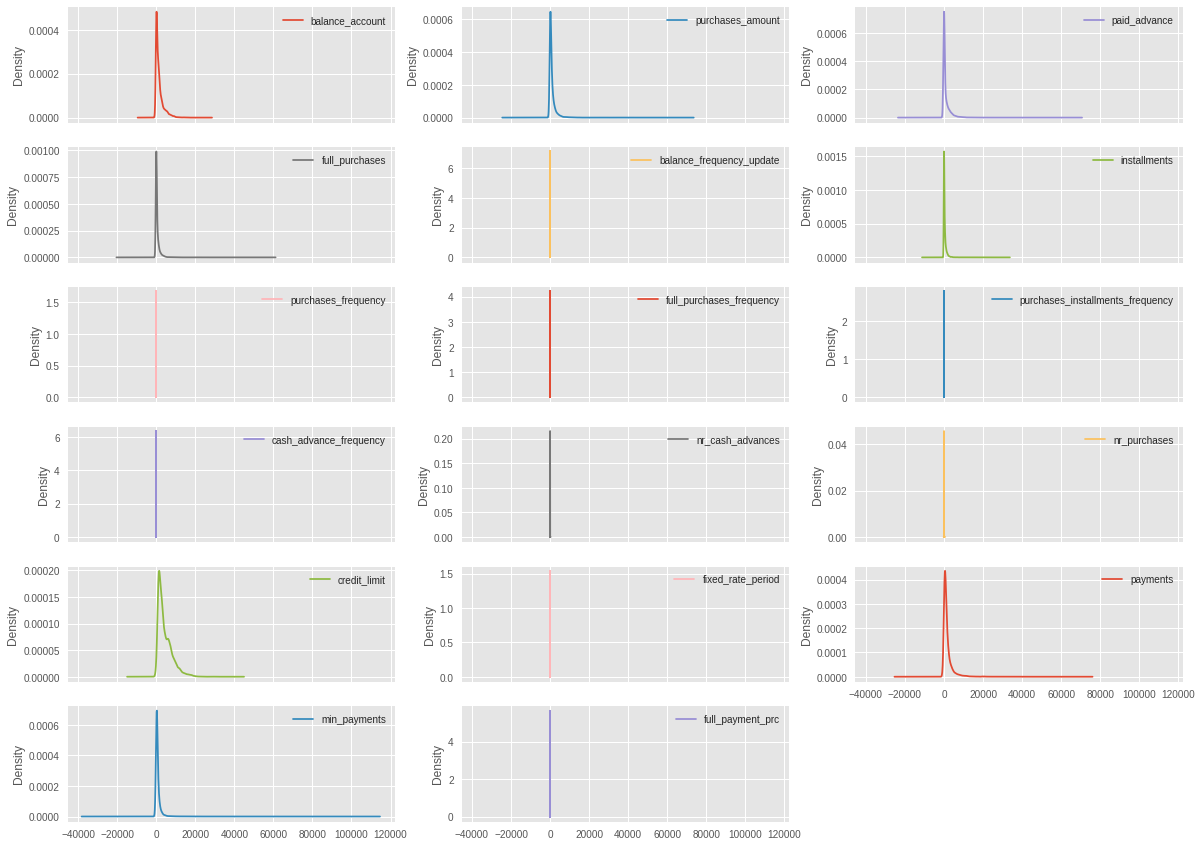

In [ ]:
# Check the distribution of the data 
ax=df.plot(kind="kde", subplots=True, layout=(6,3), figsize=(20,15))

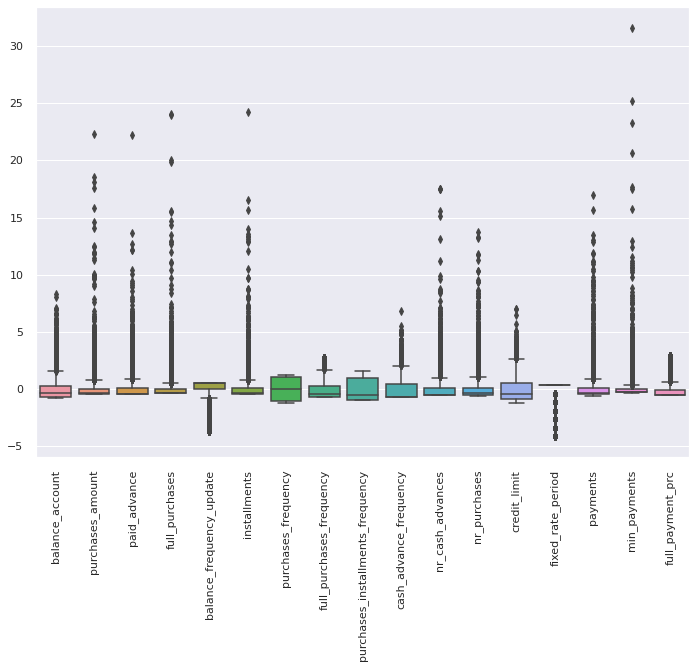

In [ ]:
predictors = df.drop('customer_id', axis = 1) 
scaler = StandardScaler() # Scaling the data so the plot makes sense once it is ploted
df_scaled = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(data=df_scaled)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

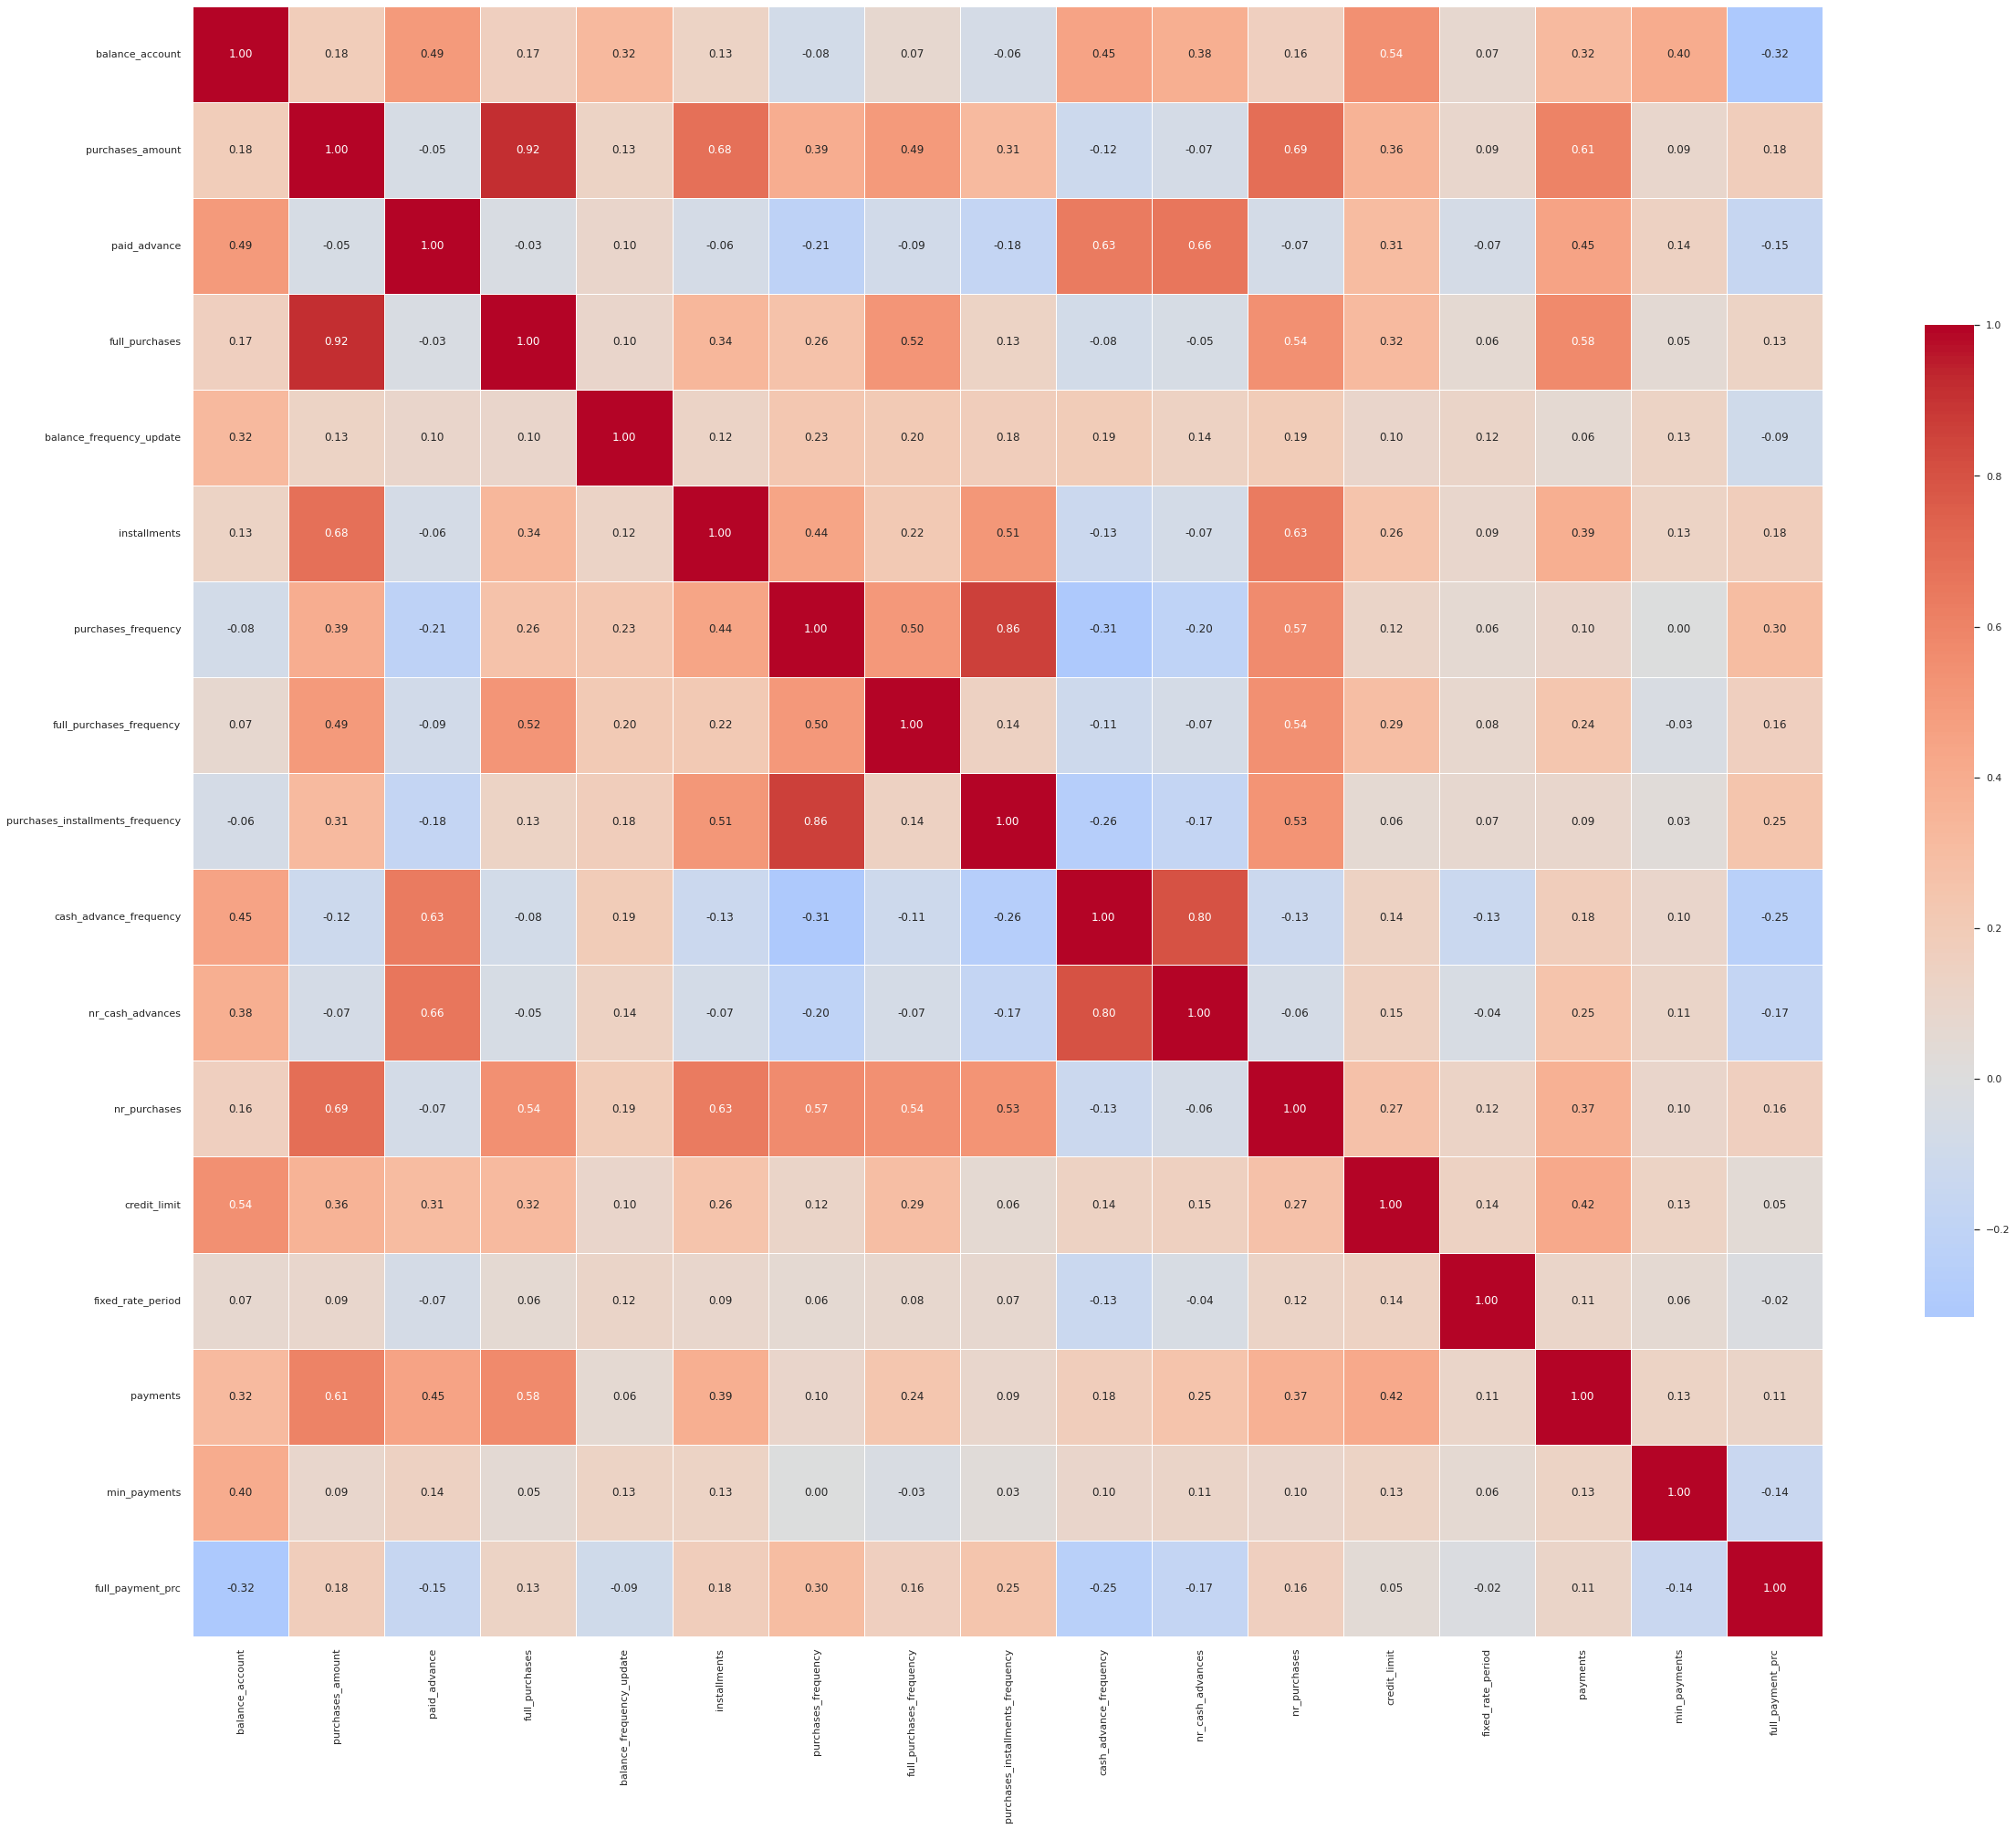

In [ ]:
corr = df.corr() # computing correlation values
fig, ax = plt.subplots(figsize=(40, 40)) # setting up the empty plot to use next

# Assembly of the heatmap:
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [ ]:
# upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
# #  print(upper_tri)
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.79)]
# print(to_drop)

['full_purchases', 'purchases_installments_frequency', 'nr_cash_advances']


In [ ]:
threshold = 0.79

def high_cor_function(df):
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = c1[c1.values!=1]    
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [ ]:
predictors = df.drop('customer_id', axis = 1) 
high_cor_function(predictors)

NameError: ignored

In [ ]:
# df1 = df.drop(['customer_id','full_purchases', 'purchases_installments_frequency', 'cash_advance_frequency'], axis=1)
df1 = df.drop(['customer_id'], axis=1)

In [ ]:
df1.shape

(8500, 17)

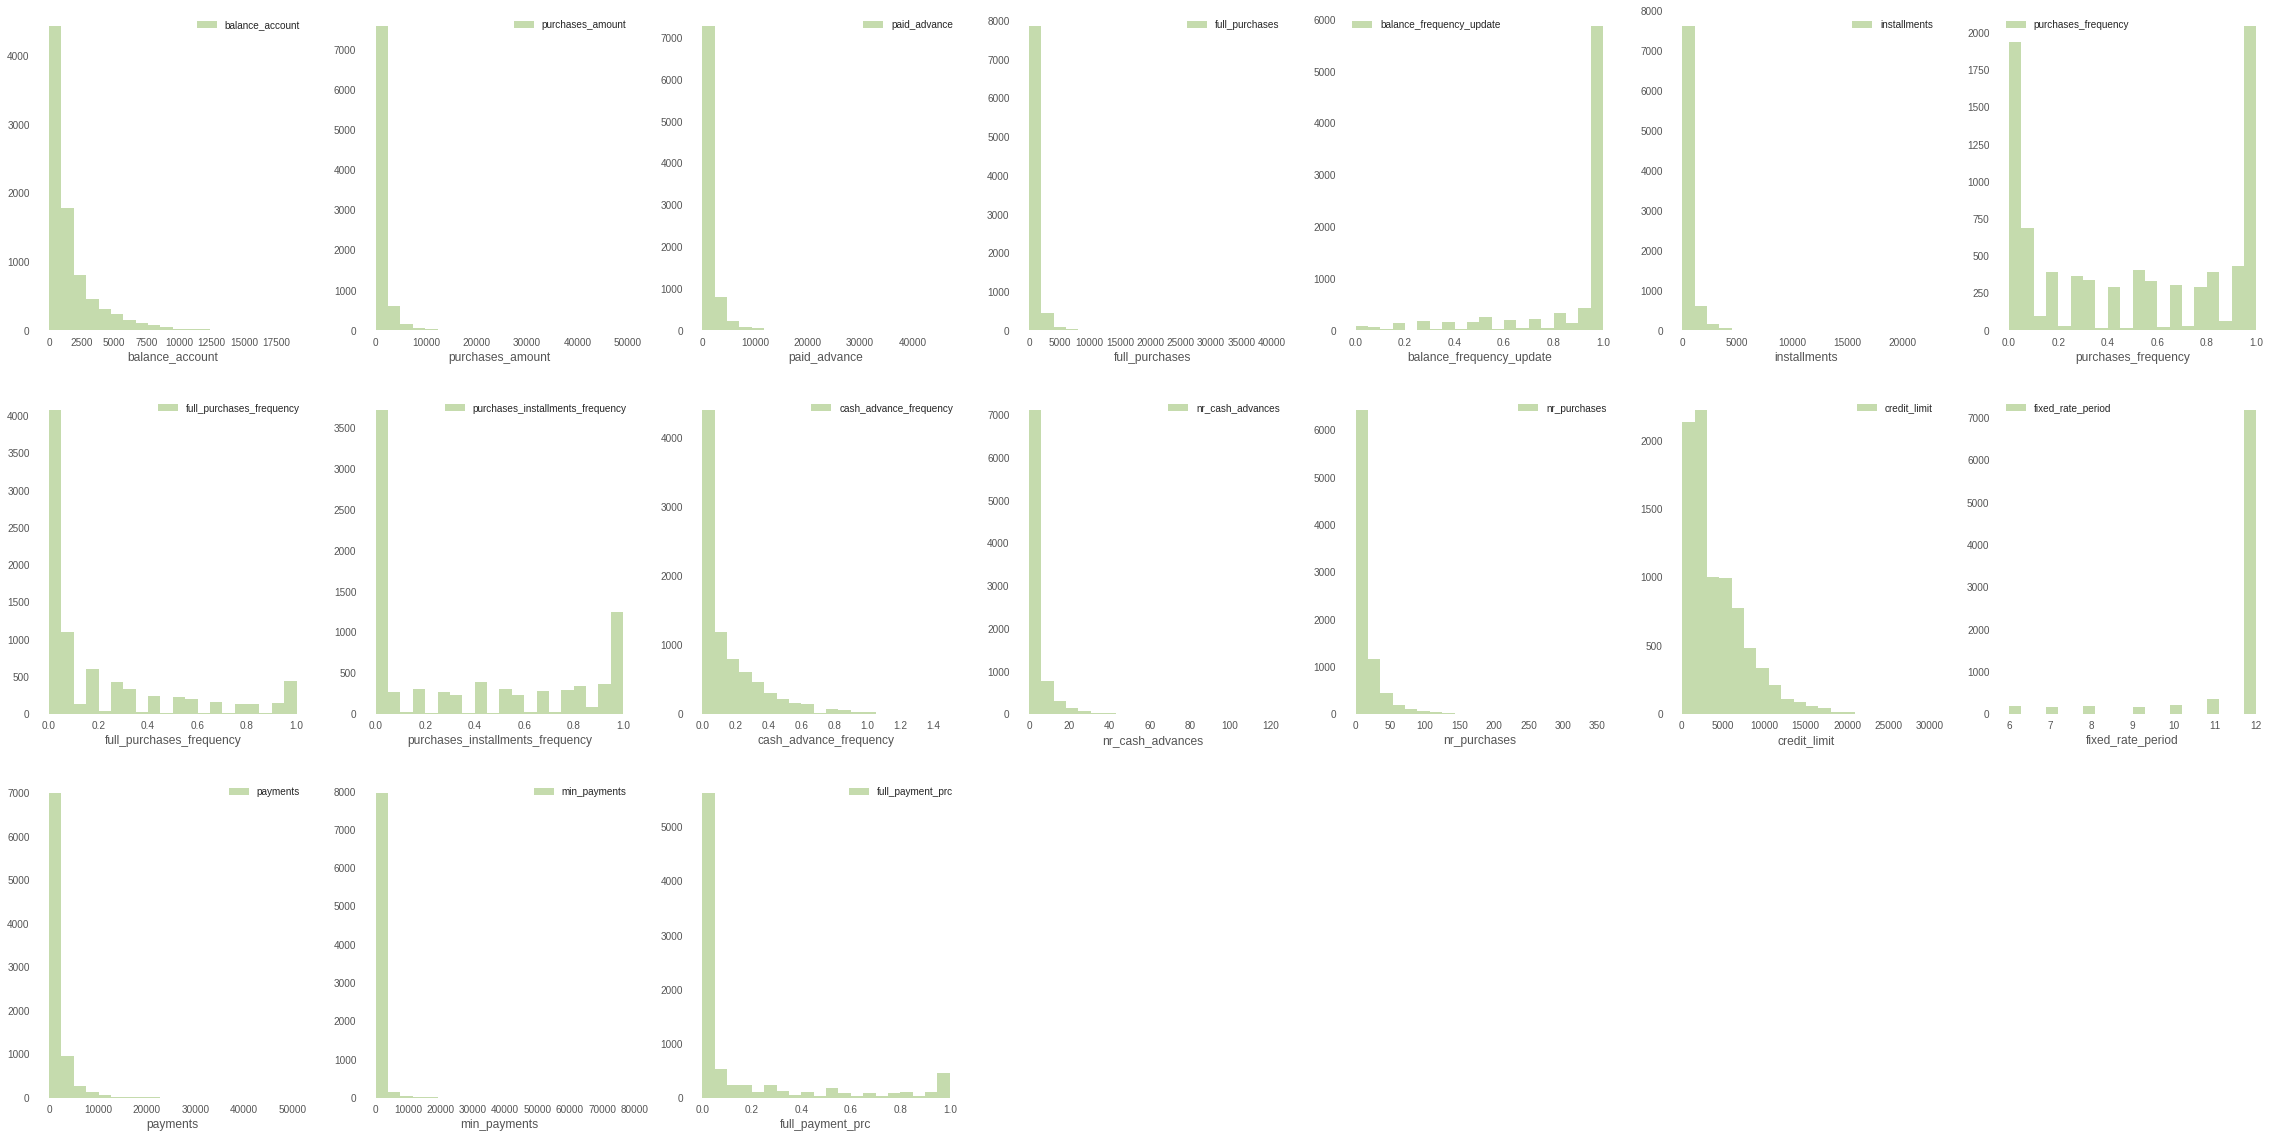

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'
# DESCRIPTION --> # it plots the distributions of your data
def plot_distrib(df, ncols, nrows, figsize):
    vars_ = df.columns
    c = 0
    plt.figure(figsize=figsize)
    for v in vars_:
        ax = plt.subplot(nrows, ncols, c + 1)
        _, nbins, _ = plt.hist(df[v], 20, color="g", alpha=0.6, label=v)
        plt.xlabel(v)
        plt.legend(loc="best")
        c = c + 1
    plt.show()
plot_distrib(df1, ncols=7, nrows=3, figsize=(40, 20))

In [ ]:
df1.dtypes

balance_account                     float64
purchases_amount                    float64
paid_advance                        float64
full_purchases                      float64
balance_frequency_update            float64
installments                        float64
purchases_frequency                 float64
full_purchases_frequency            float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
nr_cash_advances                      int64
nr_purchases                          int64
credit_limit                        float64
fixed_rate_period                     int64
payments                            float64
min_payments                        float64
full_payment_prc                    float64
dtype: object

In [ ]:
# Should reconsider if this is a proper method
# df1=df1.dropna()

df1['credit_limit'] = df['credit_limit'].fillna(-1)
df1['min_payments'] = df['min_payments'].fillna(-1)
df1.isna().sum()

balance_account                     0
purchases_amount                    0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
purchases_frequency                 0
full_purchases_frequency            0
purchases_installments_frequency    0
cash_advance_frequency              0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

In [ ]:
df1.shape

(8500, 17)

In [ ]:
r_seed = 23  # random seed to use during modeling for reproducability purposes

In [ ]:

cluster_errors = []
for i in range(1, 10):
    n_clusters = i
    kmeans_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            (
                "cluster",
                KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0, 
                       # n_jobs=1
                      ),
            ),
        ]
    )
    kmeans_pipeline.fit(df1)
    kmeans_pipeline.predict(df1)
    cluster_errors.append(kmeans_pipeline.named_steps["cluster"].inertia_)


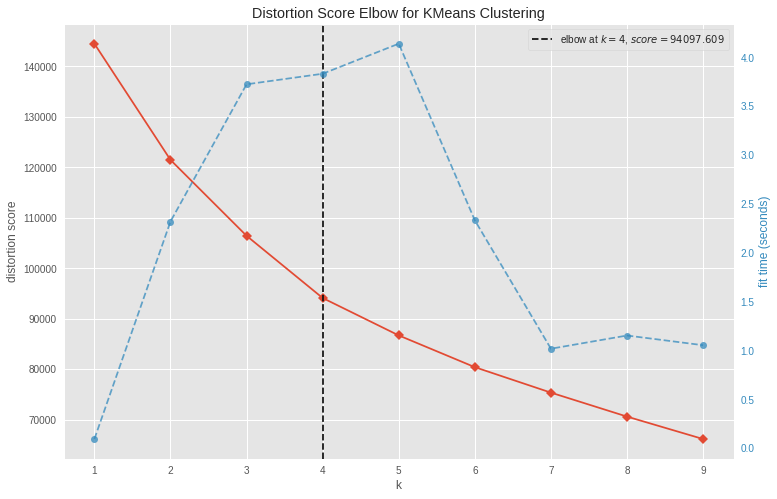

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# visualizing the Elbow method

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 8)

# List with Features:

features = list(df1.columns)

# Setting up the content of variable 'X':
X = df1.loc[:,features].values

numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])
numeric_features = list(range(len(features)))

feature_encoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

X = feature_encoder.fit_transform(X)

# Clustering model and visualizer:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X) # Fit the data to the visualizer
visualizer.poof() # Draw/show/poof the data

**PCA ANALYSIS :To identify n_component**

In [ ]:
# Eigenvalue decomposition: eigenvalue(magnitude), eigen-vector(direction)
# Step 1: standardize
df_std = StandardScaler().fit_transform(df1)

# Step 2: Covariance matrix
import numpy as np
mean_vec = np.mean(df_std, axis=0)
cov_mat = (df_std - mean_vec).T.dot((df_std - mean_vec)) / (df_std.shape[0]-1)
print('Covariance matrix: \n', cov_mat)

# Step 3: Eigen decomposition 
cov_mat = np.cov(df_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigenvectors: \n', eig_vecs)
# print('\nEigenvalues: \n', eig_vals)

Covariance matrix: 
 [[ 1.00012195  0.17821692  0.49369993  0.31195153  0.12421584 -0.0861024
   0.06509819  0.38224491  0.15227222  0.54191923  0.06942585  0.32058124
   0.39871653 -0.33129106]
 [ 0.17821692  1.00012195 -0.05234251  0.12183533  0.68331083  0.38953209
   0.49326201 -0.06918679  0.6868524   0.35857884  0.08343217  0.61286316
   0.09308644  0.17539329]
 [ 0.49369993 -0.05234251  1.00012195  0.08985221 -0.06636244 -0.21713539
  -0.0904092   0.6566266  -0.07636623  0.30638677 -0.07341731  0.45279393
   0.14230178 -0.15814727]
 [ 0.31195153  0.12183533  0.08985221  1.00012195  0.11503993  0.22774933
   0.18842596  0.13253833  0.18252657  0.09115838  0.10513239  0.03867767
   0.13283439 -0.15446015]
 [ 0.12421584  0.68331083 -0.06636244  0.11503993  1.00012195  0.44023227
   0.21460658 -0.07587678  0.62835529  0.26026482  0.08271115  0.3874784
   0.12945283  0.17766068]
 [-0.0861024   0.38953209 -0.21713539  0.22774933  0.44023227  1.00012195
   0.50221214 -0.20713814  0.563

In [ ]:
# Sorting Eigenpairs 
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('works fine')

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

works fine
Eigenvalues in descending order:
3.789444717638629
2.7313523204810766
1.328098352499716
1.047754846635532
0.9785555063149189
0.8081058197481388
0.7934854680898189
0.6437800786734539
0.540847727790035
0.4048396059254707
0.3038777404846404
0.24801355504369121
0.23750477532531825
0.14604680242273954


“how many principal components are we going to choose for our new feature subspace?”

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

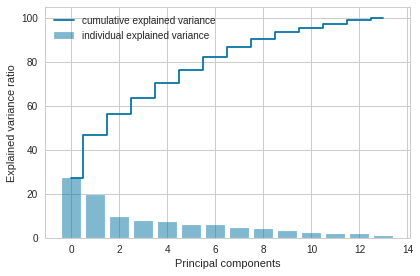

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(14), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(14), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

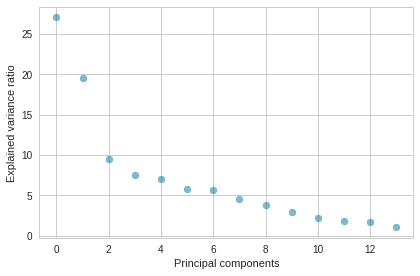

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.scatter(range(14), var_exp, alpha=0.5)
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.tight_layout()

In [ ]:
# PCA
pca = sklearnPCA(n_components=5)
pca_df=pca.fit_transform(df_std)

# Dump components relations with features:
print(pd.DataFrame(pca.components_, columns=df1.columns, index = ['PC1','Pc2','PC3','PC4','PC5']))


     balance_account  purchases_amount  paid_advance  \
PC1         0.203178          0.435609      0.072066   
Pc2         0.440551         -0.096195      0.488945   
PC3        -0.219734          0.114066      0.271129   
PC4         0.058013          0.134321     -0.197707   
PC5         0.042160          0.106724     -0.042248   

     balance_frequency_update  installments  purchases_frequency  \
PC1                  0.152202      0.374210             0.297175   
Pc2                  0.110394     -0.119588            -0.288851   
PC3                 -0.542600      0.041833            -0.144294   
PC4                 -0.430976      0.214928            -0.306474   
PC5                 -0.055896      0.289336             0.037031   

     full_purchases_frequency  nr_cash_advances  nr_purchases  credit_limit  \
PC1                  0.319762          0.033868      0.419491      0.295585   
Pc2                 -0.152738          0.437301     -0.148563      0.219175   
PC3              

**CALCULATE CLUSTER ID BASED ON UMAP AND KMEAN**

In [ ]:

# UMAP and Kmean
# Build Pipeline
pipe_umap_kmean = Pipeline(
        [
            ("scl", StandardScaler()), 
            ("UMAP", UMAP(n_neighbors=30, n_components=8,  min_dist= 0.3)), 
            ("cluster", KMeans(n_clusters=4, random_state=r_seed, verbose=0))]
    )

# fit the data
pipe_umap_kmean.fit(df1)

# Create Cluster id
df1_umap_cluster = pd.DataFrame(
    data = pipe_umap_kmean.named_steps["cluster"].labels_,
    index = df1.index,
    columns=['Cluster_id'])


# Check 
df1_umap_cluster['Cluster_id'].value_counts()

3    3066
1    1909
0    1829
2    1696
Name: Cluster_id, dtype: int64

In [ ]:
df1_umap_cluster.head()

,Cluster_id
0,1
1,2
2,3
3,1
4,2


In [ ]:
df1_umap_cluster.shape

(8500, 1)

In [ ]:
# Adding Cluster ID to the Original dataset 
clustered_df=pd.concat([df1, df1_umap_cluster], axis=1)
clustered_df.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster_id
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,3
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,2
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,0
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,3
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,2


**SUPERVISED LEARNING MODEL to find feature importance for Clustering**

In [ ]:
X =clustered_df.drop('Cluster_id', axis=1)
y= clustered_df['Cluster_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((6800, 17), (1700, 17))

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
plt.style.use("fivethirtyeight")

In [ ]:
clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'Cluster_id',
            session_id=13,
            # max_encoding_ohe=600, # columns with 600 or less categories will be One-hot encoded ELSE target encoding
            # rare_to_value=0.008, # Categories with less than 0.008 (0.8%) of the data will be grouped into a new category (Other)
            rare_value='Other',
            experiment_name='swiss1',
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,Cluster_id
2,Target type,Multiclass
3,Original data shape,"(6800, 18)"
4,Transformed data shape,"(6800, 18)"
5,Transformed train set shape,"(4760, 18)"
6,Transformed test set shape,"(2040, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models(fold=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9626,0.9981,0.9626,0.9627,0.9626,0.9488,0.9489,0.5400
xgboost,Extreme Gradient Boosting,0.9584,0.9979,0.9584,0.9585,0.9584,0.9431,0.9431,2.5300
lightgbm,Light Gradient Boosting Machine,0.9574,0.9979,0.9574,0.9575,0.9573,0.9416,0.9417,0.9640
gbc,Gradient Boosting Classifier,0.9504,0.9972,0.9504,0.9506,0.9504,0.9322,0.9322,4.5020
rf,Random Forest Classifier,0.9481,0.9969,0.9481,0.9482,0.9481,0.9290,0.9290,0.7800
dt,Decision Tree Classifier,0.9155,0.9428,0.9155,0.9158,0.9156,0.8844,0.8845,0.0740
ada,Ada Boost Classifier,0.9002,0.9654,0.9002,0.9010,0.9002,0.8635,0.8638,0.5060
lda,Linear Discriminant Analysis,0.8960,0.9883,0.8960,0.9008,0.8949,0.8568,0.8589,0.0560
ridge,Ridge Classifier,0.8851,0.0000,0.8851,0.8897,0.8836,0.8411,0.8436,0.0400
nb,Naive Bayes,0.8040,0.9736,0.8040,0.8421,0.8070,0.7381,0.7494,0.0540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
et = create_model('et', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9569,0.9979,0.9569,0.9571,0.9569,0.9412,0.9412
1,0.9685,0.9984,0.9685,0.9687,0.9685,0.9569,0.9569
2,0.9632,0.9983,0.9632,0.9632,0.9632,0.9496,0.9497
3,0.9622,0.9979,0.9622,0.9624,0.9621,0.9482,0.9483
4,0.9622,0.9983,0.9622,0.9622,0.9622,0.9482,0.9482
Mean,0.9626,0.9981,0.9626,0.9627,0.9626,0.9488,0.9489
Std,0.0037,0.0002,0.0037,0.0037,0.0037,0.0050,0.0050


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_et = tune_model(et, n_iter=10,
                      search_library='scikit-learn',
                      search_algorithm='random',
                      # custom_grid={
                      #     'n_estimators': [100, 200, 300, 400, 500],
                      #     'max_depth': [10, 15, 20, None],
                      #     'max_features': ['sqrt', 'log2', 0.5, 0.8]
                      # },
                      optimize='f1',
                      fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9304,0.9905,0.9304,0.9308,0.9305,0.9046,0.9047
1,0.9391,0.9914,0.9391,0.9397,0.9392,0.9168,0.9170
2,0.9172,0.9903,0.9172,0.9183,0.9175,0.8867,0.8869
3,0.9357,0.9901,0.9357,0.9366,0.9358,0.9119,0.9121
4,0.9346,0.9907,0.9346,0.9356,0.9348,0.9105,0.9108
Mean,0.9314,0.9906,0.9314,0.9322,0.9315,0.9061,0.9063
Std,0.0076,0.0004,0.0076,0.0075,0.0076,0.0105,0.0105


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


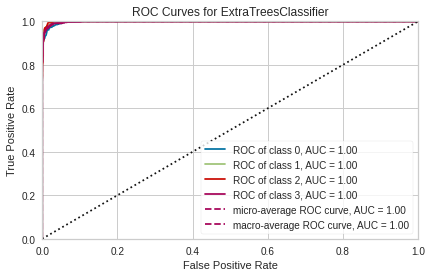

In [ ]:
plot_model(et)

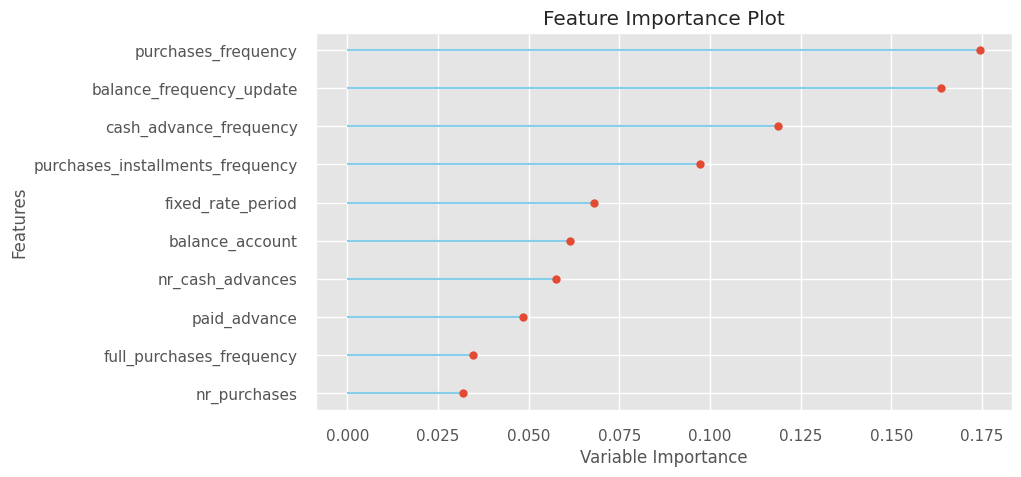

In [ ]:
plot_model(et, plot='feature')

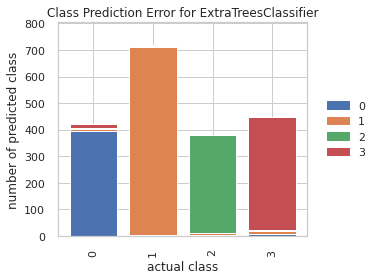

In [ ]:
plot_model(et, plot='error')

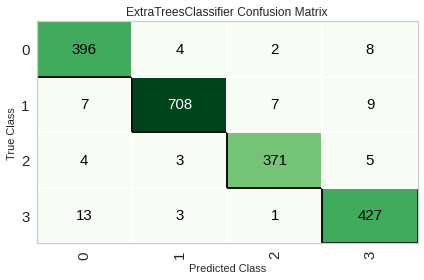

In [ ]:
plot_model(et, plot='confusion_matrix')

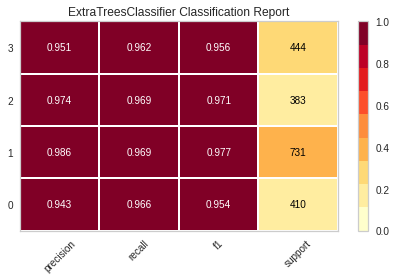

In [ ]:
plot_model(et, plot='class_report')

In [ ]:
# evaluate_model(et)

**DATA VISUALIZATION: GROUP ANALYSIS BASED ON IMPORTANT FEATURES**

In [ ]:
clustered_df.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc', 'Cluster_id'],
      dtype='object')

In [ ]:
clustered_df['balance_frequency_update'].unique()

array([0.909091, 1.      , 0.363636, 0.818182, 0.727273, 0.636364,
       0.833333, 0.272727, 0.      , 0.9     , 0.166667, 0.75    ,
       0.454545, 0.571429, 0.545455, 0.142857, 0.8     , 0.333333,
       0.714286, 0.181818, 0.3     , 0.875   , 0.625   , 0.2     ,
       0.090909, 0.555556, 0.857143, 0.888889, 0.125   , 0.7     ,
       0.111111, 0.5     , 0.666667, 0.285714, 0.777778, 0.25    ,
       0.6     , 0.375   , 0.222222, 0.444444, 0.4     , 0.1     ,
       0.428571])

In [ ]:
clustered_df['Cluster_id'].value_counts()

3    3066
1    1909
0    1829
2    1696
Name: Cluster_id, dtype: int64

**CUSTOMER GROUP 1**

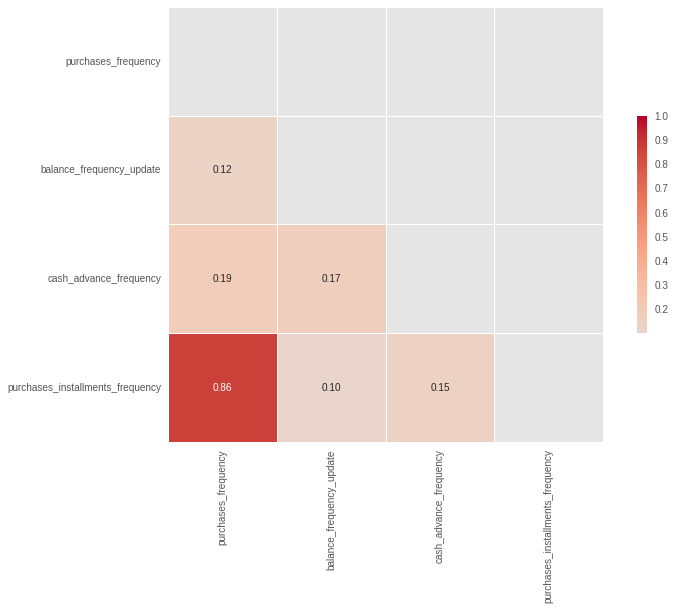

In [ ]:
corr=cluster1[['purchases_frequency', 'balance_frequency_update','cash_advance_frequency','purchases_installments_frequency']].corr()
matrix = np.triu(corr)
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    mask=matrix
)

**CUSTOMER GROUP 2**

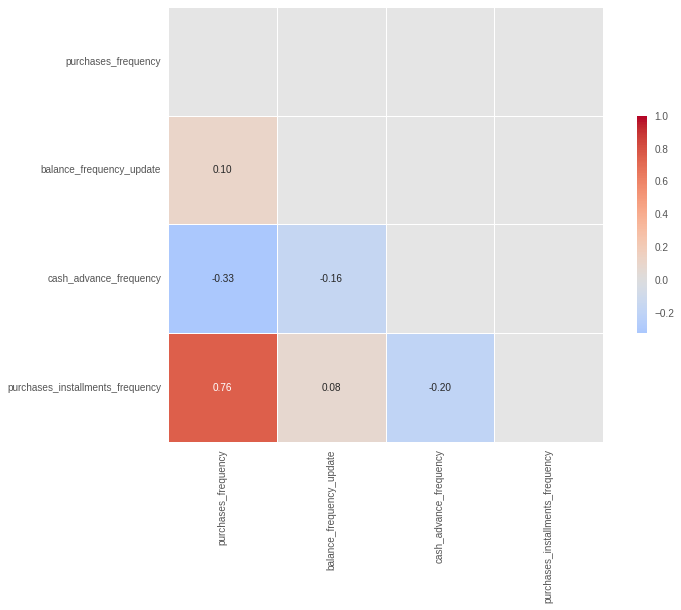

In [ ]:
corr=cluster2[['purchases_frequency', 'balance_frequency_update','cash_advance_frequency','purchases_installments_frequency']].corr()
matrix = np.triu(corr)
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    mask=matrix
)

**CUSTOMER GROUP 3**

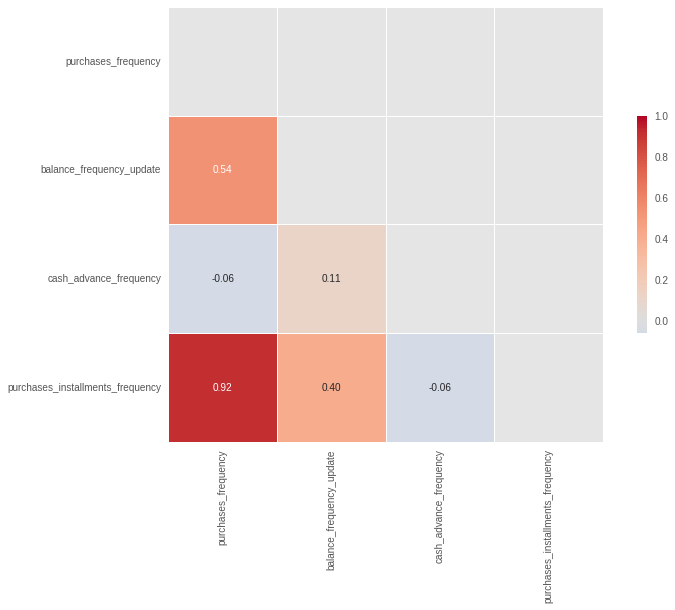

In [ ]:
corr=cluster3[['purchases_frequency', 'balance_frequency_update','cash_advance_frequency','purchases_installments_frequency']].corr()
matrix = np.triu(corr)
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    mask=matrix
)

**CUSTOMER GROUP 4**

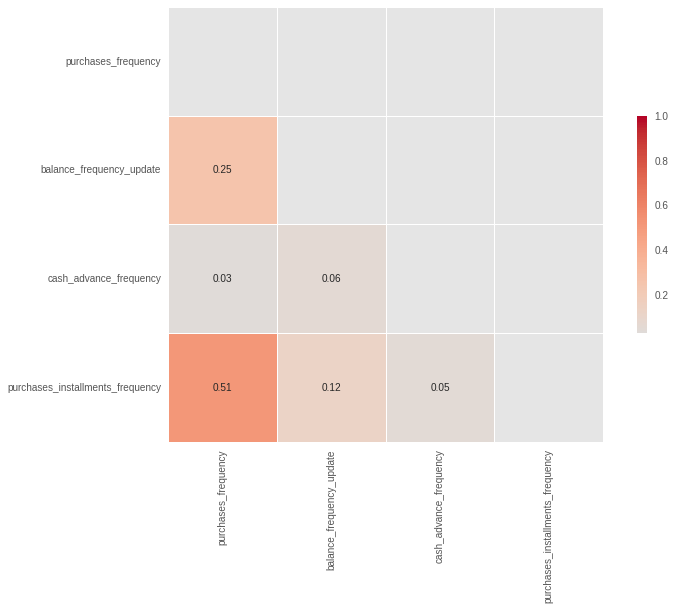

In [ ]:
corr=cluster4[['purchases_frequency', 'balance_frequency_update','cash_advance_frequency','purchases_installments_frequency']].corr()
matrix = np.triu(corr)
h = sns.heatmap(
    corr,
    cmap="coolwarm",
    vmax=1,
    fmt=".2f",
    annot=True,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    mask=matrix
)

In [ ]:
cluster1 = clustered_df[clustered_df['Cluster_id']==0]
cluster2 = clustered_df[clustered_df['Cluster_id']==1]
cluster3 = clustered_df[clustered_df['Cluster_id']==2]
cluster4 = clustered_df[clustered_df['Cluster_id']==3]

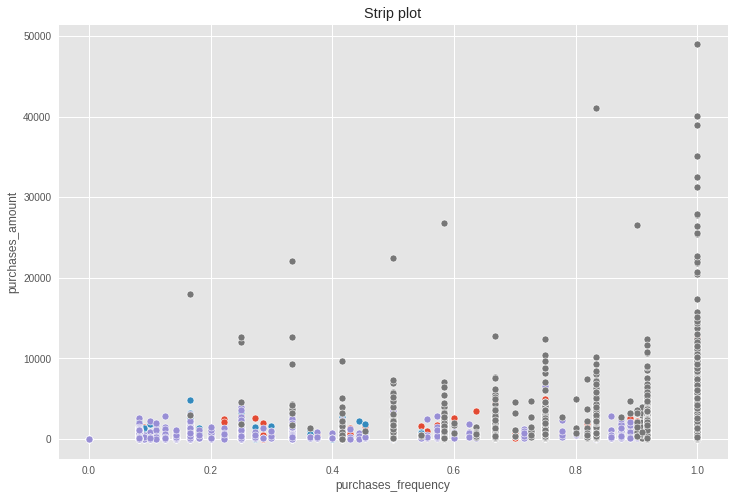

In [ ]:
sns.scatterplot(data=cluster1,
              x="purchases_frequency",
              y="purchases_amount",
              # hue="Cluster_id",
              palette = "muted"
             )
sns.scatterplot(data=cluster2,
              x="purchases_frequency",
              y="purchases_amount",
              # hue="Cluster_id",
              palette = "muted"
             )
sns.scatterplot(data=cluster3,
              x="purchases_frequency",
              y="purchases_amount",
              # hue="Cluster_id",
              palette = "muted"
             )
sns.scatterplot(data=cluster4,
              x="purchases_frequency",
              y="purchases_amount",
              # hue="Cluster_id",
              palette = "muted"
             )

plt.title("Strip plot")
plt.show()